In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os 
os.chdir("/content/drive/My Drive/fast.ai v3/section 2/cust_dl_lib")

!git config --global user.email "rajp152000@gmail.com"
!git config --global user.name "rajp152k"
!pip install fire
import fire
datasets_path = "/content/drive/My Drive/fast.ai v3/datasets"

     |████████████████████████████████| 81kB 5.4MB/s 
  Created wheel for fire: filename=fire-0.2.1-py2.py3-none-any.whl size=103527 sha256=2dbc48830d592a4b3736e4286572ccec50061c647afd1e40df732730aabb65e5
  Stored in directory: /root/.cache/pip/wheels/31/9c/c0/07b6dc7faf1844bb4688f46b569efe6cafaa2179c95db821da
Successfully built fire


# Datablock API fundamentals


In [0]:
#export 
from exps.nb_07a import *

In [7]:
datasets.URLs.IMAGENETTE_160
# using the 160*160 version

'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160'

using this custom built dialled down version of imagenet for quick testing purposes.

## functionality for retreiveing an image list

In [10]:
help(datasets.untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [11]:
path = datasets.untar_data(url = datasets.URLs.IMAGENETTE_160,dest = datasets_path)

In [12]:
path

PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160')

In [0]:
#export
import PIL,os,mimetypes
Path.ls = lambda x:list(x.iterdir()) 


In [14]:
path.ls()

[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val')]

In [18]:
len((path/'val').ls())

10

have 10 classes in this reduced down version of imagenet

seeing inside a folder:
first one's the tench

In [19]:
(path/'val').ls()

[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n03425413'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n03445777'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n03888257'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n03394916'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n03417042'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n02979186'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n03028079'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n02102040'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n03000684')]

In [0]:
path_tench = path/'val'/'n01440764'

In [27]:
path_tench.ls()[:10]

[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_25090.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_3760.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_11652.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_14731.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_9720.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_7160.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_8302.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_2290.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/ILSVRC2012_val_00009191.JPEG'),
 PosixP

In [31]:
img_fn = path_tench.ls()[:3]
img_fn

[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_25090.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_3760.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_11652.JPEG')]

In [0]:
imgs = [PIL.Image.open(img_fn[i]) for i in range(3)]

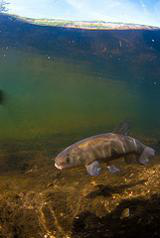

In [53]:
imgs[0]

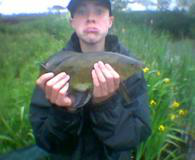

In [50]:
imgs[1]

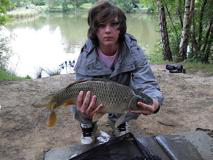

In [51]:
imgs[2]

these are tenches

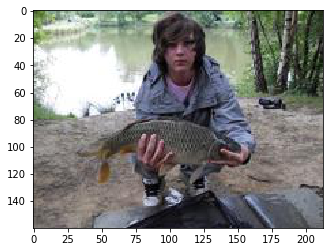

In [54]:
plt.imshow(imgs[2])

the shape is around 160*210'ish , checking with numpy

In [0]:
import numpy as np

In [0]:
img = np.array(img[2]) 

In [59]:
img.shape

(160, 213, 3)

PIL stores channels in the end

gathering the images now

In [0]:
#export 
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))

In [65]:
' '.join(image_extensions)

'.wbmp .svgz .ppm .jng .cr2 .cdt .pnm .jpx .art .jpm .ief .nef .psd .ras .jp2 .xwd .djvu .jpg .png .crw .jpe .pbm .xpm .pcx .gif .xbm .jpg2 .bmp .pat .jpeg .ico .tiff .tif .cpt .jpf .orf .erf .rgb .djv .pgm .cdr .svg'

In [0]:
#export 
def setify(o): return o if isinstance(o,set) else set(listify(o))

testing the working of setify

In [0]:
test_eq(setify('aa'), {'aa'})
test_eq(setify(['aa',1]), {'aa',1})
test_eq(setify(None), set())
test_eq(setify(1), {1})
test_eq(setify({1}), {1})

getting the files now:
using os.walk for a recursive traversal

In [0]:
#export
def _get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res
# avoiding specific system files(dot files) and getting ones in extensions

In [72]:
t = [o.name for o in os.scandir(path_tench)]
t = _get_files(path, t,extensions = image_extensions)
t[:3],len(t)

([PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/n01440764_25090.JPEG'),
  PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/n01440764_3760.JPEG'),
  PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/n01440764_11652.JPEG')],
 387)

a recursive version

In [0]:
#export
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for i,(p,d,f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filenames)
            if include is not None and i==0: d[:] = [o for o in d if o in include]
            else:                            d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)

In [74]:
get_files(path_tench,image_extensions)[:5]

[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_25090.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_3760.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_11652.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_14731.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/val/n01440764/n01440764_9720.JPEG')]

but when, need to recurse when starting from path

In [76]:
get_files(path,image_extensions,recurse=True)[:5]

[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_20558.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_21513.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_29828.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_21285.JPEG'),
 PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_10789.JPEG')]

In [77]:
# getting all file names
all_fns = get_files(path,image_extensions, recurse=True)
len(all_fns)

13394

checking performance 

In [78]:
%timeit -n 10 get_files(path,image_extensions,recurse=True)

10 loops, best of 3: 176 ms per loop


takes a lot of time with any other api or viewing the file in GUI

# Model Prep

functionality checklist:
 - collect files
 - train-valid split
 - label files
 - preparatory transform
 - make a tensor
 - create a data loader
 - batched transform
 - allow for a test set 

 ## file collection

In [0]:
#export
def compose(x, funcs, *args, order_key='_order', **kwargs):
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key): x = f(x, **kwargs)
    return x
 
class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        super().__init__(items)
        self.path,self.tfms = Path(path),tfms

    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'
    
    def new(self, items, cls=None):
        if cls is None: cls=self.__class__
        return cls(items, self.path, tfms=self.tfms)
    
    def  get(self, i): return i
    def _get(self, i): return compose(self.get(i), self.tfms)
    
    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res,list): return [self._get(o) for o in res]
        return self._get(res)

class ImageList(ItemList):
    # passing cls to call the constructor later on 
    @classmethod
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None: extensions = image_extensions
        return cls(get_files(path, extensions, recurse=recurse, include=include), path, **kwargs)
    
    def get(self, fn): return PIL.Image.open(fn)

 look up class and instance methods before proceeding 

In [0]:
#export
class Transform(): _order=0

class MakeRGB(Transform):
    def __call__(self, item): return item.convert('RGB')

def make_rgb(item): return item.convert('RGB')

to convert a single channel to a 3 channel image

In [0]:
il = ImageList.from_files(path,tfms=make_rgb)

In [88]:
il

ImageList (13394items)
[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_20558.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_21513.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_29828.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_21285.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_10789.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_403.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_4855.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_21763.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n034

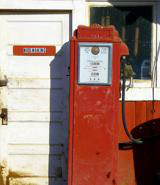

In [90]:
img = il[0]; img

In [93]:
img.__repr__()

'<PIL.Image.Image image mode=RGB size=160x185 at 0x7F806B1F0BE0>'

## splitting into a train-validation set

having  a look at the paths

In [95]:
il.items[0]

PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_20558.JPEG')

distinct folders already exist in this case

In [96]:
il.items[0].parent.parent

PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train')

creating a mask to separate the files:
 - creating one for a folder split(specific to this)
 - one for a split by a custom function

 passing a partial of the first to the second one

In [0]:
#export
def grandparent_splitter(fn, valid_name='valid', train_name='train'):
    gp = fn.parent.parent.name
    return True if gp==valid_name else False if gp==train_name else None

def split_by_func(items, f):
    mask = [f(o) for o in items]
    # `None` values will be filtered out
    f = [o for o,m in zip(items,mask) if m==False]
    t = [o for o,m in zip(items,mask) if m==True ]
    return f,t

In [0]:
splitter = partial(grandparent_splitter, valid_name='val')

In [102]:
%time train,valid = split_by_func(il,splitter)

CPU times: user 36.5 ms, sys: 0 ns, total: 36.5 ms
Wall time: 42.1 ms


In [103]:
len(train),len(valid)

(9469, 3925)

In [0]:
#export 
class SplitData():
    def __init__(self, train, valid): self.train,self.valid = train,valid
        
    def __getattr__(self,k): return getattr(self.train,k)
    #This is needed if we want to pickle SplitData and be able to load it back without recursion errors
    def __setstate__(self,data:Any): self.__dict__.update(data) 
    
    @classmethod
    def split_by_func(cls, il, f):
        lists = map(il.new, split_by_func(il.items, f))
        return cls(*lists)

    def __repr__(self): return f'{self.__class__.__name__}\nTrain: {self.train}\nValid: {self.valid}\n'

In [106]:
sd = SplitData.split_by_func(il, splitter); sd

SplitData
Train: ImageList (9469items)
[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_20558.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_21513.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_29828.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_21285.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_10789.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_403.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_4855.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_21763.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/trai

## Labelling 

In [0]:
#export
from collections import OrderedDict

def uniqueify(x, sort=False):
    res = list(OrderedDict.fromkeys(x).keys())
    if sort: res.sort()
    return res

a processor is created after observing the training data and then is applied to the validation set without modification

In [0]:
#export
class Processor(): 
    def process(self, items): return items

class CategoryProcessor(Processor):
    def __init__(self): self.vocab=None
    
    def __call__(self, items):
        #The vocab is defined on the first use.
        if self.vocab is None:
            self.vocab = uniqueify(items)
            self.otoi  = {v:k for k,v in enumerate(self.vocab)}
        return [self.proc1(o) for o in items]
    def proc1(self, item):  return self.otoi[item]
    
    def deprocess(self, idxs):
        assert self.vocab is not None
        return [self.deproc1(idx) for idx in idxs]
    def deproc1(self, idx): return self.vocab[idx]

a vocab is needed to enumerate the class names: creating one if it doesn't exist(in case of a training set) and using the same one for the validation set( failure to do so results in a random mapping due to false mappings)

In [0]:
#export
def parent_labeler(fn): return fn.parent.name

def _label_by_func(ds, f, cls=ItemList): return cls([f(o) for o in ds.items], path=ds.path)

class LabeledData():
    def process(self, il, proc): return il.new(compose(il.items, proc))

    def __init__(self, x, y, proc_x=None, proc_y=None):
        self.x,self.y = self.process(x, proc_x),self.process(y, proc_y)
        self.proc_x,self.proc_y = proc_x,proc_y
        
    def __repr__(self): return f'{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n'
    def __getitem__(self,idx): return self.x[idx],self.y[idx]
    def __len__(self): return len(self.x)
    
    def x_obj(self, idx): return self.obj(self.x, idx, self.proc_x)
    def y_obj(self, idx): return self.obj(self.y, idx, self.proc_y)
    
    def obj(self, items, idx, procs):
        isint = isinstance(idx, int) or (isinstance(idx,torch.LongTensor) and not idx.ndim)
        item = items[idx]
        for proc in reversed(listify(procs)):
            item = proc.deproc1(item) if isint else proc.deprocess(item)
        return item

    @classmethod
    def label_by_func(cls, il, f, proc_x=None, proc_y=None):
        return cls(il, _label_by_func(il, f), proc_x=proc_x, proc_y=proc_y)

def label_by_func(sd, f, proc_x=None, proc_y=None):
    train = LabeledData.label_by_func(sd.train, f, proc_x=proc_x, proc_y=proc_y)
    valid = LabeledData.label_by_func(sd.valid, f, proc_x=proc_x, proc_y=proc_y)
    return SplitData(train,valid)

In [0]:
ll = label_by_func(sd,parent_labeler,proc_y=CategoryProcessor())

In [0]:
assert ll.train.proc_y is ll.valid.proc_y

In [112]:
ll.train.y

ItemList (9469items)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0...]
Path: /content/drive/My Drive/fast.ai v3/datasets/imagenette2-160

In [113]:
ll.train.y.items[0]

0

In [114]:
ll.train.y_obj(0)

'n03425413'

In [116]:
ll.train.y_obj(slice(2))

['n03425413', 'n03425413']

In [117]:
ll

SplitData
Train: LabeledData
x: ImageList (9469items)
[PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_20558.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_21513.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_29828.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_21285.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_10789.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_403.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_4855.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/imagenette2-160/train/n03425413/n03425413_21763.JPEG'), PosixPath('/content/drive/My Drive/fast.ai v3/datasets/image

ll represents pairs of file and label names 

## Tensor Tranform

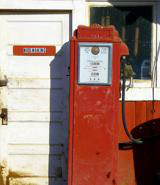

In [119]:
ll.train[0][0]

resizing to the same size before transforming

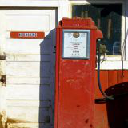

In [121]:
ll.train[0][0].resize((128,128))

PIL image objects are represented by integers;
converting to tensors of floats after the resizing 

_order is used to define the order of transforms to be applied: the lower the earlier

In [0]:
#export
class ResizeFixed(Transform):
    _order=10
    def __init__(self,size):
        if isinstance(size,int): size=(size,size)
        self.size = size
        
    def __call__(self, item): return item.resize(self.size, PIL.Image.BILINEAR)

def to_byte_tensor(item):
    res = torch.ByteTensor(torch.ByteStorage.from_buffer(item.tobytes()))
    w,h = item.size
    return res.view(h,w,-1).permute(2,0,1)
to_byte_tensor._order=20

def to_float_tensor(item): return item.float().div_(255.)
to_float_tensor._order=30

In [0]:
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]
# order in the list doesn't matter: using _order attribute in the Transform class
il = ImageList.from_files(path, tfms=tfms)
sd = SplitData.split_by_func(il, splitter)
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())

creating a function to show an image from it's tensor

In [0]:
#export
def show_image(im, figsize=(3,3)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(im.permute(1,2,0))

the dim for channel in PIL objects is the last one instead of the first one as in the case when training

In [125]:
x,y = ll.train[0]
x.shape

torch.Size([3, 128, 128])

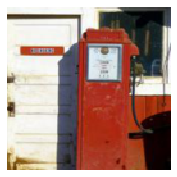

In [126]:
show_image(x)

# Modeling
## Databunch

putting the sets together in a DataBunch

In [0]:
bs = 64

In [0]:
train_dl,valid_dl = get_dls(ll.train,ll.valid,bs,num_workers=4)

In [0]:
x,y = next(iter(train_dl))

In [130]:
x.shape

torch.Size([64, 3, 128, 128])

'n03028079'

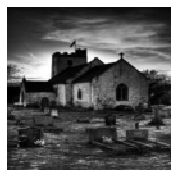

In [132]:
show_image(x[0])
ll.train.proc_y.vocab[y[0]]

In [135]:
y # displaying the corresponding enumerations

tensor([7, 2, 7, 5, 5, 7, 7, 6, 7, 1, 8, 1, 4, 2, 2, 0, 6, 7, 8, 6, 5, 6, 3, 9,
        6, 5, 2, 3, 0, 8, 1, 4, 5, 2, 0, 5, 9, 9, 4, 4, 2, 2, 9, 9, 2, 9, 3, 4,
        7, 3, 1, 2, 7, 1, 8, 7, 5, 1, 3, 4, 6, 1, 5, 6])

In [0]:
class DataBunch():
    def __init__(self,train_dl,valid_dl,c_in=None,c_out=None):
        self.train_dl,self.valid_dl,self.c_in,self.c_out = train_dl,valid_dl,c_in,c_out
        # capable of dealing with hyperspectral images
        # due to c_in and c_out being passed as variables:
        # number of channels in and out

    @property
    def train_ds(self): return self.train_dl.dataset

    @property
    def valid_ds(self): return self.valid_dl.dataset

In [0]:
#export 
def databunchify(sd,bs,c_in=None,c_out=None,**kwargs):
    dls = get_dls(sd.train,sd.valid,bs,**kwargs)
    return DataBunch(*dls,c_in=c_in,c_out=c_out)

SplitData.to_databunch = databunchify

summarizing the desired way of operating the data:

In [0]:
path = datasets.untar_data(url = datasets.URLs.IMAGENETTE_160,dest = datasets_path)
tfms = [make_rgb,ResizeFixed(128),to_byte_tensor,to_float_tensor]

il = ImageList.from_files(path, tfms = tfms)
sd = SplitData.split_by_func(il,partial(grandparent_splitter,valid_name='val'))
ll = label_by_func(sd,parent_labeler,proc_y=CategoryProcessor())
data  = ll.to_databunch(bs,c_in=3,c_out=10,num_workers=4)

# MODEL

In [0]:
cbfs  = [partial(AvgStatsCallback,accuracy),CudaCallback]

normalizing the statistics from a batch

In [0]:
m,s = x.mean((0,2,3)).cuda(),x.std((0,2,3)).cuda()# stats for each channel

In [143]:
m,s

(tensor([0.4451, 0.4351, 0.4121], device='cuda:0'),
 tensor([0.2659, 0.2625, 0.2839], device='cuda:0'))

In [0]:
#export 
def normalize_chan(x,mean,std):
    return (x-mean[...,None,None])/std[...,None,None]

_m,_s = m,s

norm_imagenette = partial(normalize_chan,mean = _m.cuda(),std=_s.cuda())

look into what are ellipses objects

In [0]:
cbfs.append(partial(BatchTransformXCallback,norm_imagenette))

In [0]:
nfs = [64,64,128,256]

creating a func to return a nn.Sequential object according to nfs 

In [0]:
#export
import math
def prev_pow_2(x): return 2**math.floor(math.log2(x))

def get_cnn_layers(data, nfs, layer, **kwargs):
    def f(ni, nf, stride=2): return layer(ni, nf, 3, stride=stride, **kwargs)
    l1 = data.c_in
    l2 = prev_pow_2(l1*3*3)
    layers =  [f(l1  , l2  , stride=1),
               f(l2  , l2*2, stride=2),
               f(l2*2, l2*4, stride=2)]
    nfs = [l2*4] + nfs
    layers += [f(nfs[i], nfs[i+1]) for i in range(len(nfs)-1)]
    layers += [nn.AdaptiveAvgPool2d(1), Lambda(flatten), 
               nn.Linear(nfs[-1], data.c_out)]
    return layers

def get_cnn_model(data, nfs, layer, **kwargs):
    return nn.Sequential(*get_cnn_layers(data, nfs, layer, **kwargs))

def get_learn_run(nfs, data, lr, layer, cbs=None, opt_func=None, **kwargs):
    model = get_cnn_model(data, nfs, layer, **kwargs)
    init_cnn(model)
    return get_runner(model, data, lr=lr, cbs=cbs, opt_func=opt_func)

In [0]:
sched = combine_scheds([0.3,0.7], cos_1cycle_anneal(0.1,0.3,0.05))
learn,run = get_learn_run(nfs, data, 0.2, conv_layer, cbs=cbfs+[
    partial(ParamScheduler, 'lr', sched)
])

creating a summary func for the model using hooks

In [0]:
#export 
def model_summary(run,learn,data,find_all=False):
    xb,yb = get_batch(data.valid_dl,run)
    device = next(learn.model.parameters()).device#moving to GPU if not on it
    xb,yb = xb.to(device),yb.to(device)
    mods = find_modules(learn.model,is_lin_layer) if find_all else learn.model.children()
    f = lambda hook,mod,inp,out:print(f"{mod}\n{out.shape}\n")
    with Hooks(mods,f) as hooks: learn.model(xb)

In [157]:
model_summary(run,learn,data)

AttributeError: ignored

In [159]:
%time run.fit(5,learn)

train: [1.7435931972093146, tensor(0.3978, device='cuda:0')]
valid: [1.692690211982484, tensor(0.4456, device='cuda:0')]
train: [1.3794999843238462, tensor(0.5356, device='cuda:0')]
valid: [1.3871154707404458, tensor(0.5488, device='cuda:0')]
train: [1.015678732079681, tensor(0.6651, device='cuda:0')]
valid: [1.138729971138535, tensor(0.6275, device='cuda:0')]
train: [0.6572749832512673, tensor(0.7882, device='cuda:0')]
valid: [1.121333225517516, tensor(0.6512, device='cuda:0')]
train: [0.36005799558097473, tensor(0.9053, device='cuda:0')]
valid: [1.1138981638136942, tensor(0.6583, device='cuda:0')]
CPU times: user 13 s, sys: 6.67 s, total: 19.7 s
Wall time: 2min 48s


In [160]:
!python3 notebook2script.py 08_datablockAPI.ipynb

Converted 08_datablockAPI.ipynb to exps/nb_08.py


In [0]:
git add .
git commit -m "DataBlock API"